In [62]:
# Import Library
import os
import random
import matplotlib.pyplot as plt

from keras.utils import load_img
import numpy as np

# Split data
from sklearn.model_selection import train_test_split

# Model 
from keras import Sequential

# Layer
from keras.layers import Conv2D, MaxPooling2D, Flatten, Input, Dense, Dropout

In [63]:
PATH = './dataset/kartu/'
dataset = []

class_names = [name for name in os.listdir(PATH)]
print(class_names)

# Sekarang kita mau mengambil gambar satu persatu dan memasukkannya kedalam dataset
for i, class_name in enumerate(class_names):
    image_path = f'./dataset/kartu/{class_name}/'
    for image_name in os.listdir(image_path):
        image = load_img(image_path + image_name, color_mode = 'grayscale', target_size = (224, 224))
        
        # Mengambil image dari path yang sudah kita define
        image_arr = np.array(image)
        dataset.append((image_arr, i))

# print(dataset.shape())
random.shuffle(dataset)
X = [data[0] for data in dataset]
y = [data[1] for data in dataset]

X = np.array(X)
y = np.array(y)

# Di model inputnya adalah (224, 224, 1), maka kita harus melakukan reshape (224, 224, 1)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1).astype('float64')

# Melakukan Normalisasi
X /= 255

['ace of diamonds', 'five of spades', 'jack of hearts', 'six of diamonds']


In [64]:
# Splitting data -> Train : Test : Validation -> 8 : 1 : 1

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size = 0.8, random_state = 44)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, train_size = 0.5, random_state = 44)

In [57]:
# Pembuatan Model CNN
model = Sequential()
model.add(Input(shape = (224, 224, 1)))

# Convolution Layer 1
model.add(Conv2D(filters = 64, kernel_size = (5, 5), activation = 'relu'))

# Max pooling layer 1
model.add(MaxPooling2D(2, 2))

# Convolution Layer 2
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))

# Max pooling layer 2
model.add(MaxPooling2D(2, 2))

# Flattenning
model.add(Flatten())

# Fully Connection Layer
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units = len(class_names), activation = 'softmax'))


In [65]:
# Compile model and training dataset
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 3, validation_data = (X_val, y_val))

Epoch 1/3
15/15 [==============================] - 21s 1s/step - loss: 0.9021 - accuracy: 0.7962 - val_loss: 0.3038 - val_accuracy: 0.9153
Epoch 2/3
15/15 [==============================] - 21s 1s/step - loss: 0.3250 - accuracy: 0.9002 - val_loss: 0.2569 - val_accuracy: 0.9322
Epoch 3/3
15/15 [==============================] - 21s 1s/step - loss: 0.1852 - accuracy: 0.9512 - val_loss: 0.2096 - val_accuracy: 0.8814


In [66]:
# Evaluating model
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy : ', acc)
print('Loss : ', loss)

2/2 [==============================] - 0s 179ms/step - loss: 0.3496 - accuracy: 0.8983
Accuracy :  0.8983050584793091
Loss :  0.34963086247444153


1/1 [==============================] - 0s 94ms/step
[[1.8862629e-08 1.0000000e+00 1.3734623e-12 5.6235072e-11]]
five of spades
1/1 [==============================] - 0s 29ms/step
[[0.78237736 0.21255115 0.00143288 0.00363856]]
ace of diamonds


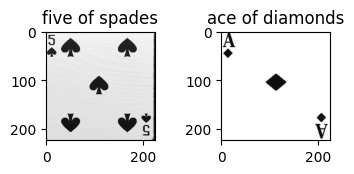

In [69]:
# Plotting Testing
# print(history.history['accuracy'])

# Prediction Data
single_names = ['002.jpg', '014.jpg']

for i, name in enumerate(single_names):
    path = './dataset/single/' + name
    img = load_img(path, color_mode = 'grayscale', target_size = (224, 224))
    img_arr = np.array(img)
    img_arr = img_arr.reshape(1, 224, 224, 1).astype('float64')
    img_arr /= 255

    prediction_res = model.predict(img_arr)
    print(prediction_res)
    res_index = np.argmax(prediction_res)
    print(class_names[res_index])

    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap = 'gray')
    plt.title(class_names[res_index])